In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./../data/data.csv')

In [3]:
data.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [4]:
data.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

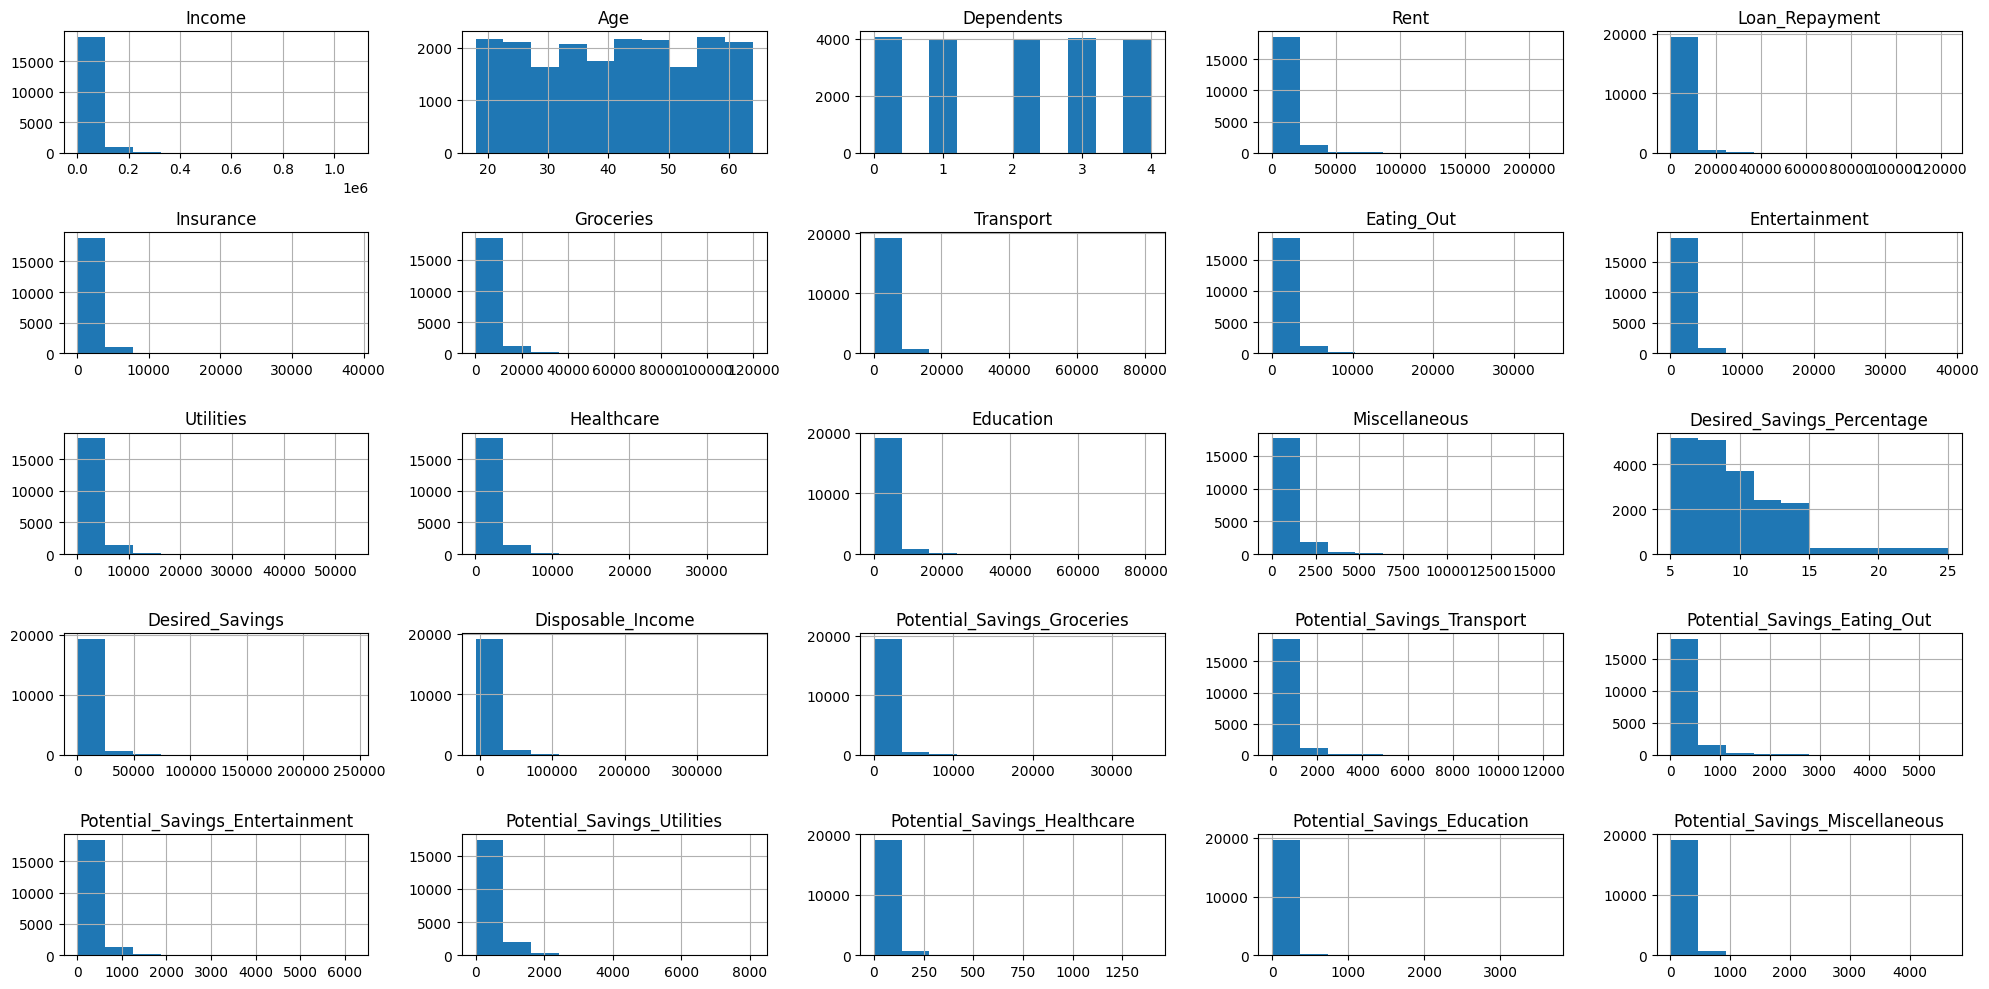

In [9]:
data.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

In [10]:
print(data.shape)

(20000, 27)


In [11]:
data.info

<bound method DataFrame.info of               Income  Age  Dependents     Occupation City_Tier          Rent  \
0       44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1       26858.596592   34           2        Retired    Tier_2   5371.719318   
2       50367.605084   35           1        Student    Tier_3   7555.140763   
3      101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4       24875.283548   52           4   Professional    Tier_2   4975.056710   
...              ...  ...         ...            ...       ...           ...   
19995   40913.466178   51           4  Self_Employed    Tier_1  12274.039853   
19996   90295.772638   21           1        Student    Tier_2  18059.154528   
19997   40604.567373   30           1   Professional    Tier_2   8120.913475   
19998  118157.817240   27           2   Professional    Tier_1  35447.345172   
19999    8209.249769   62           3   Professional    Tier_1   2462.774931   

       

In [12]:
print(data.isnull().sum())

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [14]:
print(data.duplicated().sum())

0


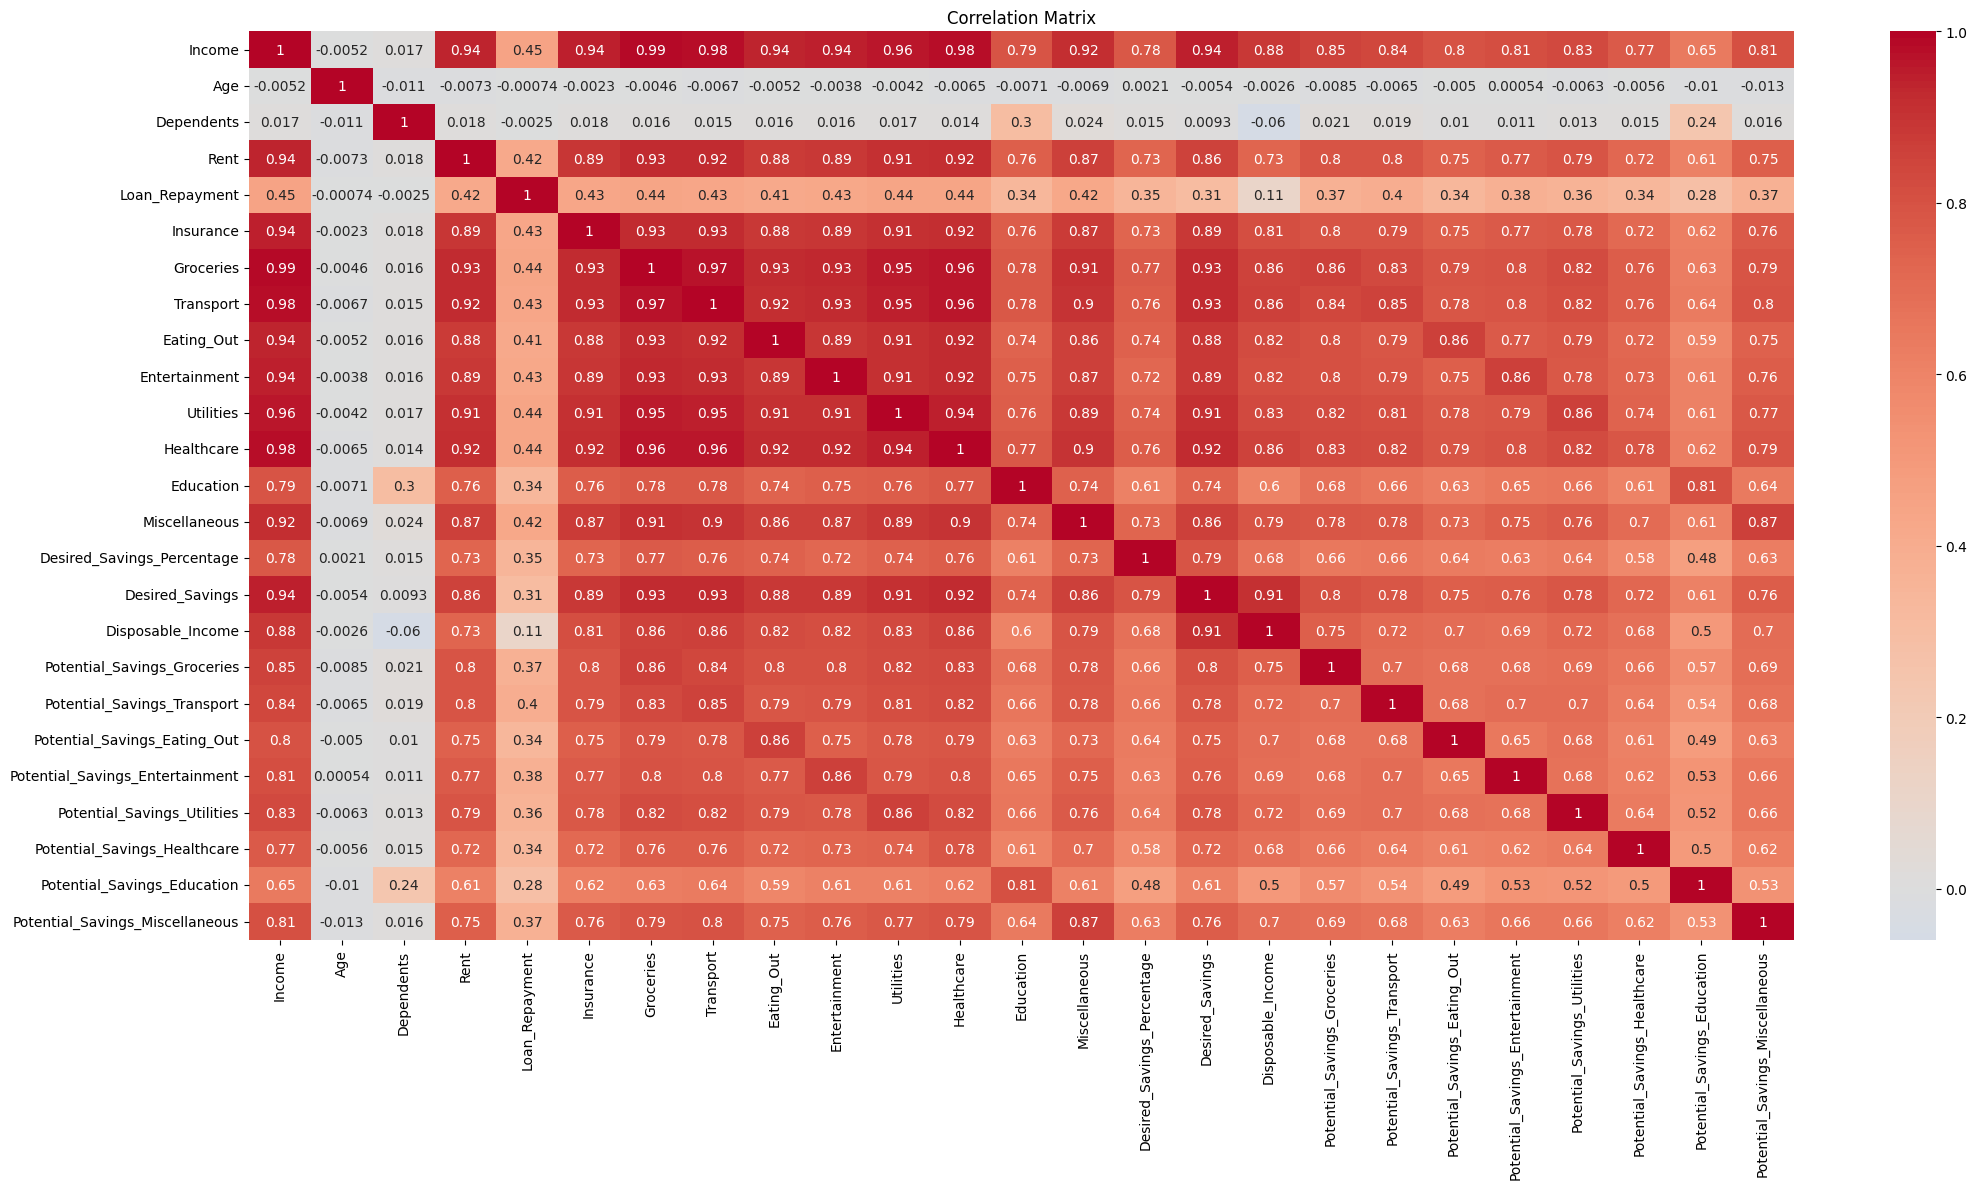

In [17]:
# Correlation matrix heatmap
plt.figure(figsize=(22, 12))
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

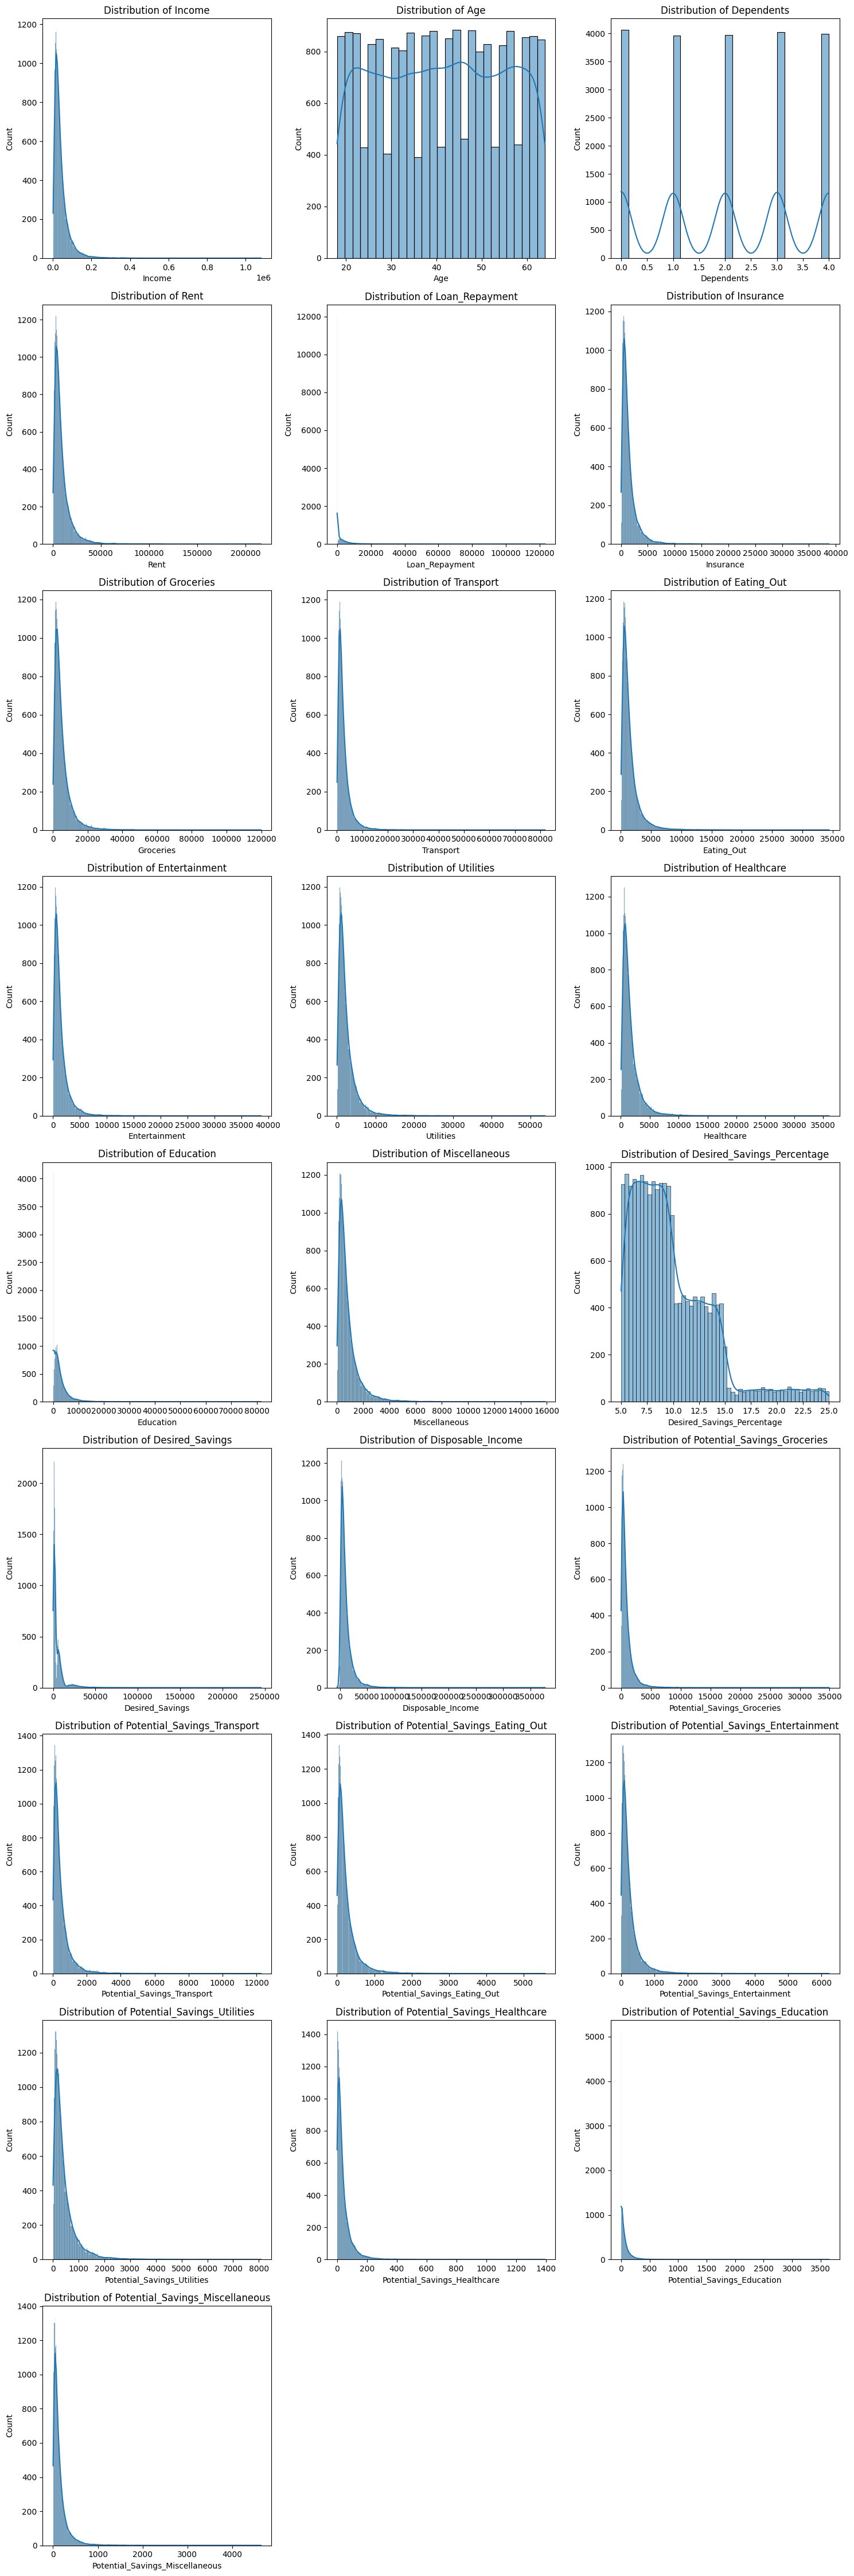

In [18]:
# Distribution plots for numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

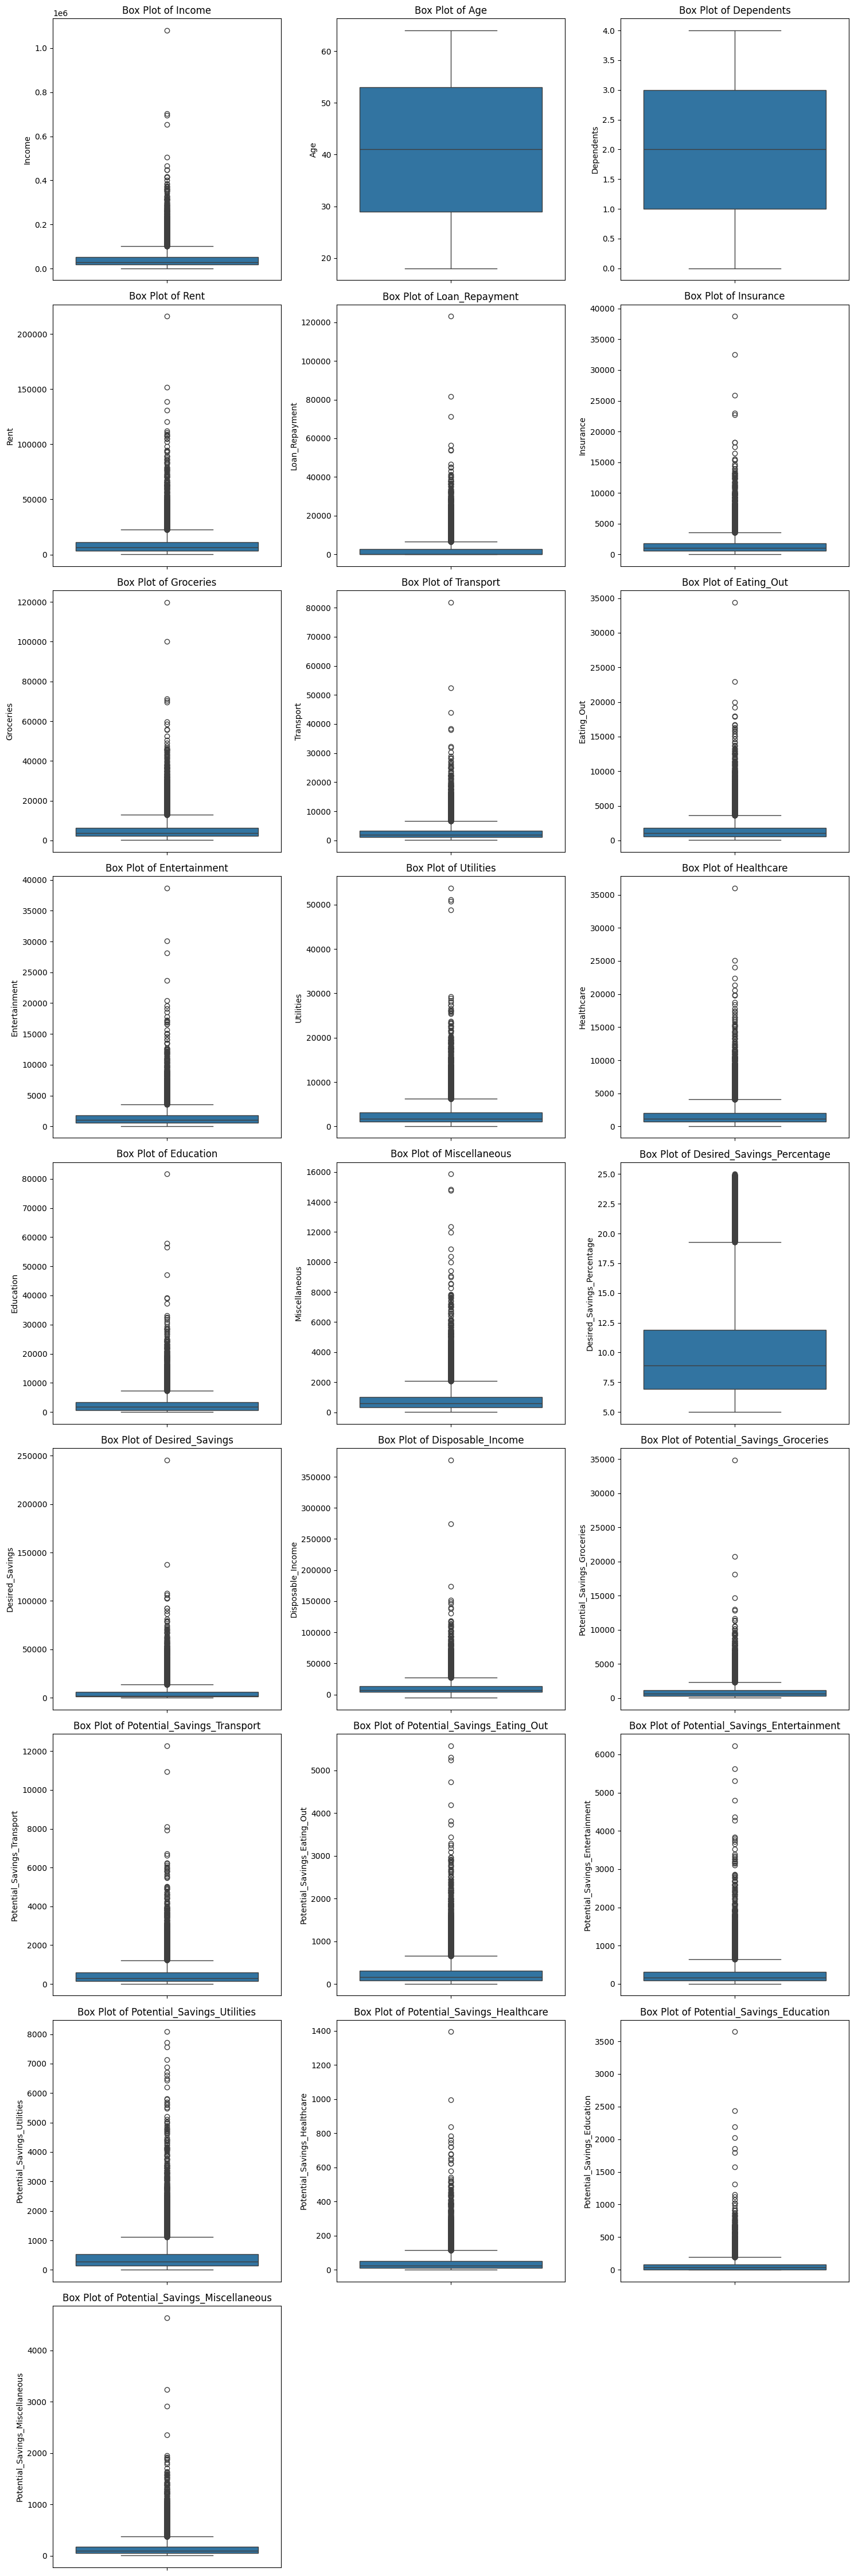

In [19]:
# Box plots to identify outliers
fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [20]:
# Statistical summary for deeper insights
print("Statistical Summary:")
print(data.describe())

# Identify specific outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check outliers for each numerical column
for col in numerical_cols:
    outliers = identify_outliers(data, col)
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")

Statistical Summary:
             Income           Age    Dependents           Rent  \
count  2.000000e+04  20000.000000  20000.000000   20000.000000   
mean   4.158550e+04     41.031450      1.995950    9115.494629   
std    4.001454e+04     13.578725      1.417616    9254.228188   
min    1.301187e+03     18.000000      0.000000     235.365692   
25%    1.760488e+04     29.000000      1.000000    3649.422246   
50%    3.018538e+04     41.000000      2.000000    6402.751824   
75%    5.176545e+04     53.000000      3.000000   11263.940492   
max    1.079728e+06     64.000000      4.000000  215945.674703   

       Loan_Repayment     Insurance      Groceries     Transport  \
count    20000.000000  20000.000000   20000.000000  20000.000000   
mean      2049.800292   1455.028761    5205.667493   2704.466685   
std       4281.789941   1492.938435    5035.953689   2666.345648   
min          0.000000     30.002012     154.078240     81.228584   
25%          0.000000    580.204749    2165.

In [21]:
# Detailed summary for numerical columns
print("Numerical Columns Summary:")
display(data.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

# Summary for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns Summary:")
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())

Numerical Columns Summary:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Income,20000.0,41585.496104,40014.540538,1301.187333,4530.517002,8172.717681,17604.875957,30185.383480,51765.446460,112862.307017,195486.117498,1.079728e+06
Age,20000.0,41.031450,13.578725,18.000000,18.000000,20.000000,29.000000,41.000000,53.000000,62.000000,64.000000,6.400000e+01
Dependents,20000.0,1.995950,1.417616,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000e+00
Rent,20000.0,9115.494629,9254.228188,235.365692,901.751875,1631.783403,3649.422246,6402.751824,11263.940492,25268.880104,44053.588554,2.159457e+05
Loan_Repayment,20000.0,2049.800292,4281.789941,0.000000,0.000000,0.000000,0.000000,0.000000,2627.142320,9604.162537,19630.255552,1.230807e+05
Insurance,20000.0,1455.028761,1492.938435,30.002012,143.598899,254.912246,580.204749,1017.124681,1787.160895,4097.653801,7266.413032,3.873493e+04
Groceries,20000.0,5205.667493,5035.953689,154.078240,557.931506,993.612879,2165.426419,3741.091535,6470.892718,14135.023430,24667.422395,1.198169e+05
Transport,20000.0,2704.466685,2666.345648,81.228584,285.645761,509.492643,1124.578012,1933.845509,3360.597508,7400.945956,12904.857962,8.186150e+04
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,140.561929,252.633327,581.011801,1029.109726,1807.075251,4126.125678,7277.599544,3.440610e+04
Entertainment,20000.0,1448.853658,1489.019270,45.421469,139.578007,253.396657,581.632906,1020.198376,1790.104082,4061.065880,7080.256287,3.866737e+04



Categorical Columns Summary:

Occupation value counts:
Occupation
Retired          5019
Professional     5011
Student          5003
Self_Employed    4967
Name: count, dtype: int64

City_Tier value counts:
City_Tier
Tier_2    10068
Tier_1     5934
Tier_3     3998
Name: count, dtype: int64


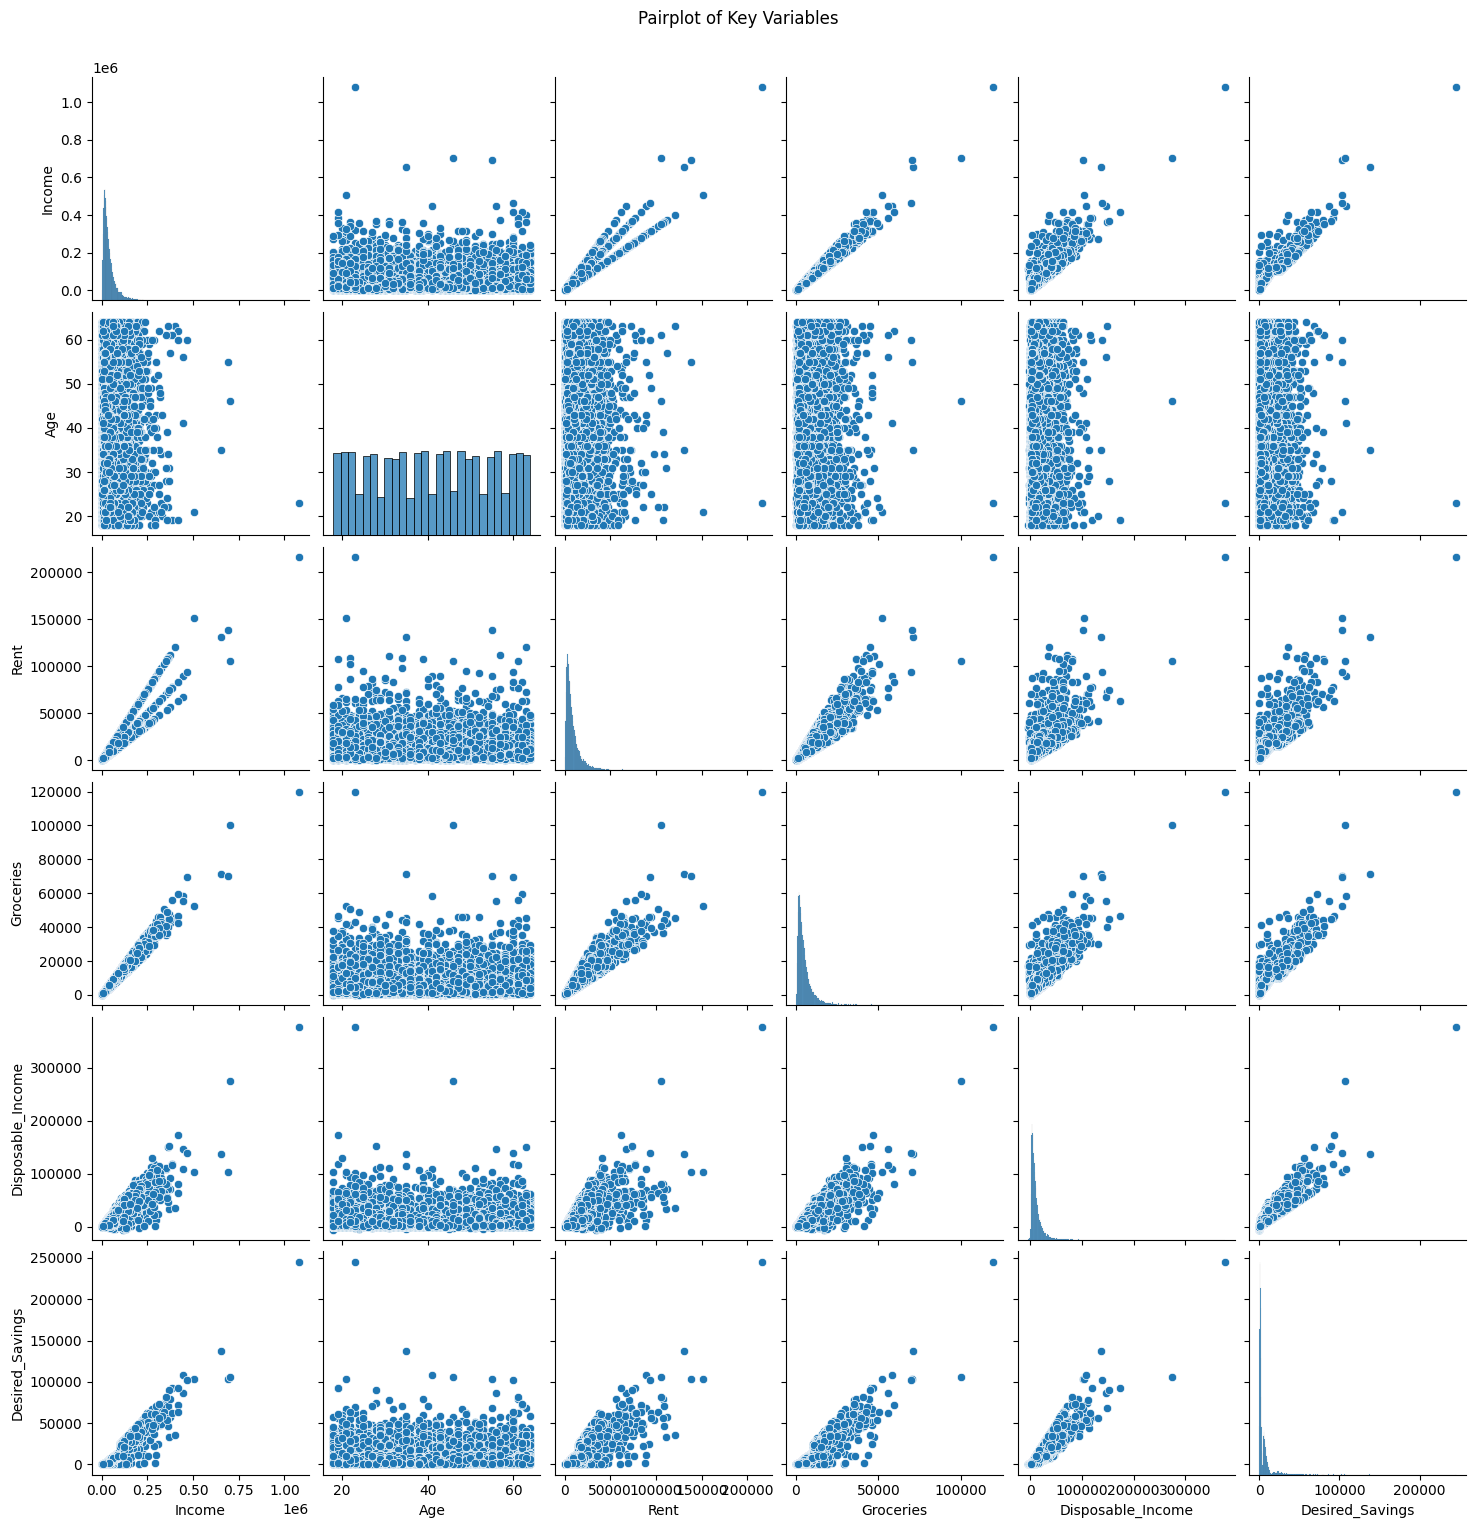

In [22]:
# Pairplot for selected variables
sns.pairplot(data, vars=['Income', 'Age', 'Rent', 'Groceries', 'Disposable_Income', 'Desired_Savings'])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

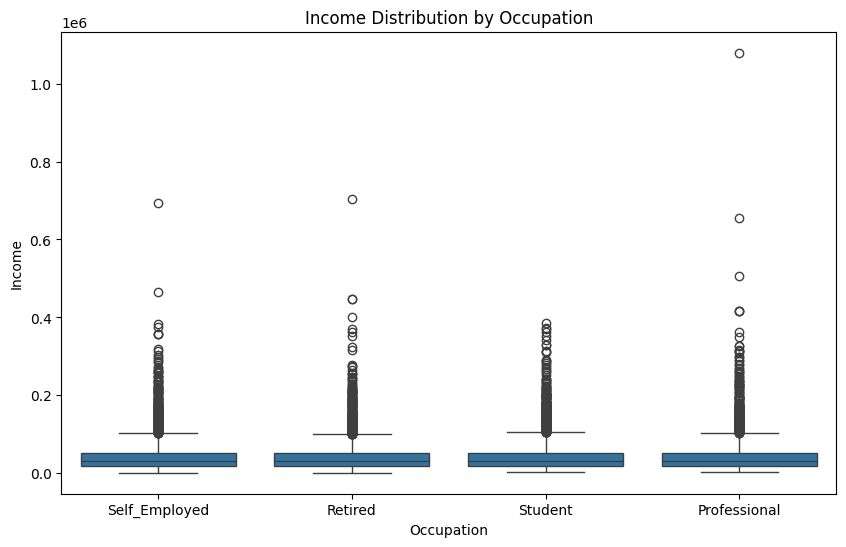

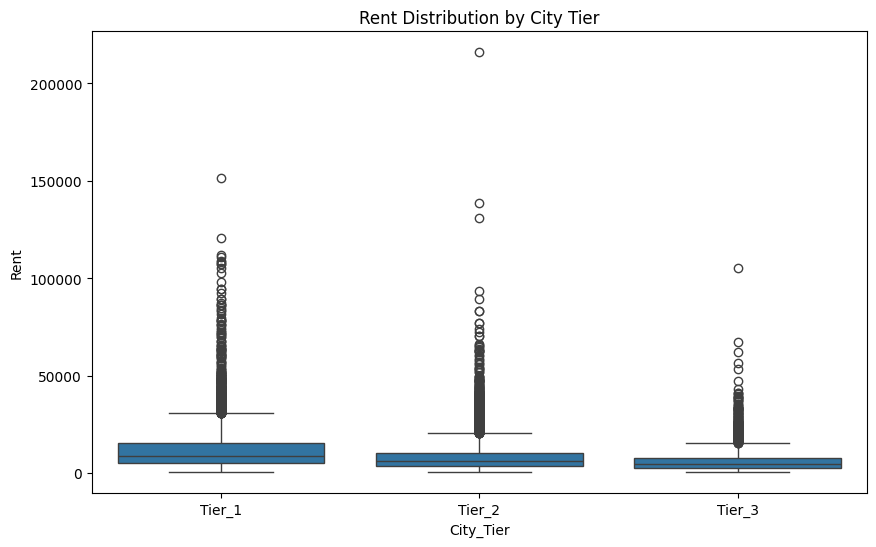

In [23]:
# Boxplot of Income by Occupation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Income', data=data)
plt.title('Income Distribution by Occupation')
plt.show()

# Boxplot of Rent by City_Tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Tier', y='Rent', data=data)
plt.title('Rent Distribution by City Tier')
plt.show()

In [26]:
# Top 10 correlated pairs
corr_matrix = data.corr(numeric_only=True)
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlation
print("Top 10 correlated pairs:")
print(corr_pairs.drop_duplicates().head(10))

Top 10 correlated pairs:
Income      Groceries     0.985717
Transport   Income        0.981955
Healthcare  Income        0.978838
Transport   Groceries     0.967789
Groceries   Healthcare    0.964956
Utilities   Income        0.964414
Healthcare  Transport     0.960117
Utilities   Groceries     0.950489
            Transport     0.945710
            Healthcare    0.944568
dtype: float64


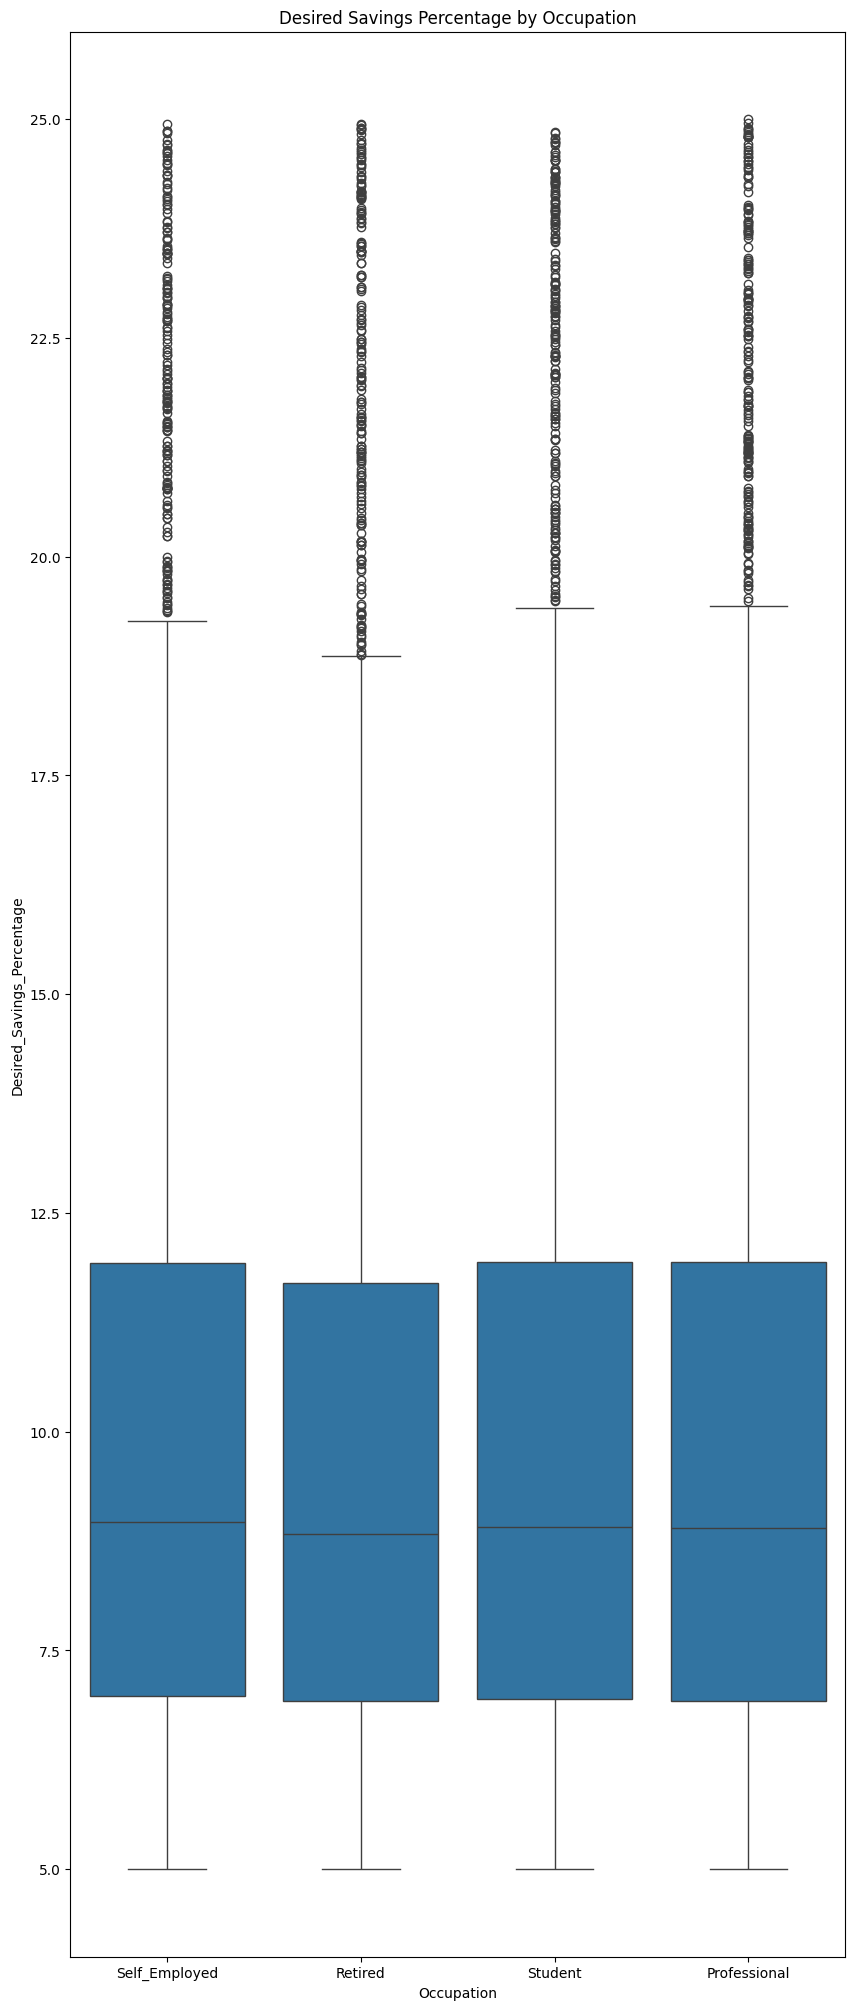

In [29]:
plt.figure(figsize=(10, 25))
sns.boxplot(x='Occupation', y='Desired_Savings_Percentage', data=data)
plt.title('Desired Savings Percentage by Occupation')
plt.show()